In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 80 # resolución gráficos

In [64]:
df = pd.read_csv('datasets/qog_std_cs_jan18.csv')
df['region_record'] = df['ht_region'].replace([1,2,3,4,5,6,7,8,9,10], ['EastEurope', 'LatAm', 'NorthAfrica', 'SudSaharian', 
                                                                        'WesternDem', 'EastAsia', 'SouthEastAsia', 'SoutAsia', 
                                                                        'Pacific', 'Caribbean'])
df.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,region_record
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SoutAsia
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EastEurope
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286,NorthAfrica
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WesternDem
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SudSaharian


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 1883 entries, ccode to region_record
dtypes: float64(1855), int64(22), object(6)
memory usage: 2.8+ MB


In [66]:
df.shape

(194, 1883)

In [67]:
df_selec = df[['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop']]
df_selec

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop
0,0.479,AFG,8,1282.6400,29.825001
1,0.762,ALB,1,8516.7002,NaN
2,0.743,DZA,3,5402.1699,39.113998
3,0.857,AND,5,32367.3300,NaN
4,0.531,AGO,4,3771.2000,25.789000
...,...,...,...,...,...
189,0.697,UZB,1,7370.7202,29.746000
190,0.769,VEN,2,10513.9600,NaN
191,0.702,WSM,9,3167.7500,0.192000
192,0.499,YEM,3,2170.9299,NaN


In [68]:
df_1 = df_selec.sample(frac = .5, random_state = 5866)
df_1

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop
95,0.495,LSO,4,1539.7900,NaN
3,0.857,AND,5,32367.3300,NaN
104,0.787,MYS,7,12284.2700,30.709000
20,0.754,BRA,2,9815.2402,202.768997
163,0.421,SSD,4,NaN,NaN
...,...,...,...,...,...
114,0.804,MNE,1,14538.5200,0.622000
160,0.665,ZAF,4,8820.0596,54.146999
93,0.582,LAO,7,2926.7700,6.898000
193,0.576,ZMB,4,1916.7900,NaN


In [69]:
df_1.shape

(97, 5)

In [70]:
df_2 = df.sample(frac = .5, random_state = 5866)
df_2 = df[['cname', 'ccodealp','ht_region','gle_cgdpc', 'undp_hdi','imf_pop', 
            'ffp_hf', 'wef_qes','wdi_expedu','wdi_ners']]
df_2

,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,Afghanistan,AFG,8,1282.6400,0.479,29.825001,8.1,NaN,3.78028,48.750320
1,Albania,ALB,1,8516.7002,0.762,NaN,7.1,4.111339,3.53944,85.278214
2,Algeria,DZA,3,5402.1699,0.743,39.113998,5.1,2.977302,NaN,NaN
3,Andorra,AND,5,32367.3300,0.857,NaN,NaN,NaN,2.99781,NaN
4,Angola,AGO,4,3771.2000,0.531,25.789000,6.0,2.134716,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
189,Uzbekistan,UZB,1,7370.7202,0.697,29.746000,6.3,NaN,NaN,92.207382
190,Venezuela,VEN,2,10513.9600,0.769,NaN,5.2,2.640229,NaN,74.789711
191,Samoa,WSM,9,3167.7500,0.702,0.192000,8.9,NaN,NaN,79.545982
192,Yemen,YEM,3,2170.9299,0.499,NaN,7.5,1.896328,NaN,41.721760


In [71]:
df_2.undp_hdi.describe()

count    186.000000
mean       0.695801
std        0.155289
min        0.347000
25%        0.567500
50%        0.726500
75%        0.804750
max        0.948000
Name: undp_hdi, dtype: float64

In [72]:
df_3 = df.sample(frac = .5, random_state = 5866)
df_3 = df[['cname', 'ccodealp','ht_region','gle_cgdpc', 'undp_hdi',
            'imf_pop', 'wef_imort','who_alc2000', 'who_tobt', 'wdi_exph']]

In [73]:
def fetch_descriptive(dataframe):
    for key , value in dataframe.iteritems():
        print(value.describe())


In [74]:
fetch_descriptive(df_2)

count             194
unique            194
top       Afghanistan
freq                1
Name: cname, dtype: object
count     194
unique    194
top       AFG
freq        1
Name: ccodealp, dtype: object
count    194.000000
mean       4.505155
std        2.643297
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: ht_region, dtype: float64
count       192.000000
mean      14279.040530
std       17914.921331
min         324.160000
25%        2614.187525
50%        7884.719750
75%       19239.776500
max      108481.130000
Name: gle_cgdpc, dtype: float64
count    186.000000
mean       0.695801
std        0.155289
min        0.347000
25%        0.567500
50%        0.726500
75%        0.804750
max        0.948000
Name: undp_hdi, dtype: float64
count    145.000000
mean      27.479697
std       48.733842
min        0.011000
25%        2.001000
50%        8.132000
75%       30.770000
max      318.789001
Name: imf_pop, dtype: float64
count    1

In [75]:
fetch_descriptive(df_3)

count             194
unique            194
top       Afghanistan
freq                1
Name: cname, dtype: object
count     194
unique    194
top       AFG
freq        1
Name: ccodealp, dtype: object
count    194.000000
mean       4.505155
std        2.643297
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: ht_region, dtype: float64
count       192.000000
mean      14279.040530
std       17914.921331
min         324.160000
25%        2614.187525
50%        7884.719750
75%       19239.776500
max      108481.130000
Name: gle_cgdpc, dtype: float64
count    186.000000
mean       0.695801
std        0.155289
min        0.347000
25%        0.567500
50%        0.726500
75%        0.804750
max        0.948000
Name: undp_hdi, dtype: float64
count    145.000000
mean      27.479697
std       48.733842
min        0.011000
25%        2.001000
50%        8.132000
75%       30.770000
max      318.789001
Name: imf_pop, dtype: float64
count    1

In [76]:
df_3

,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
0,Afghanistan,AFG,8,1282.6400,0.479,29.825001,NaN,0.010000,NaN,8.182274
1,Albania,ALB,1,8516.7002,0.762,NaN,15.000000,4.510000,29.700001,5.883105
2,Algeria,DZA,3,5402.1699,0.743,39.113998,17.200001,0.530000,NaN,7.207178
3,Andorra,AND,5,32367.3300,0.857,NaN,NaN,9.979999,33.099998,8.127135
4,Angola,AGO,4,3771.2000,0.531,25.789000,99.500000,8.330000,NaN,3.306983
...,...,...,...,...,...,...,...,...,...,...
189,Uzbekistan,UZB,1,7370.7202,0.697,29.746000,NaN,2.830000,13.300000,5.838522
190,Venezuela,VEN,2,10513.9600,0.769,NaN,13.100000,6.470000,NaN,5.256702
191,Samoa,WSM,9,3167.7500,0.702,0.192000,NaN,2.150000,32.000000,7.215109
192,Yemen,YEM,3,2170.9299,0.499,NaN,46.299999,0.040000,NaN,5.636990


In [77]:
def fetch_null_cases(dataframe, var, print_list=False):
    tmp = dataframe
    tmp['flagnull'] = tmp[var].isnull()
    count_na = 0
    for i, r in tmp.iterrows():
        if r['flagnull'] is True:
            count_na += 1
            if print_list is True:
                print( r['cname'])
                
    print(f'''
    Casos perdidos para {var}
    Cantidad de Casos: {count_na}
    Porcentaje de la muestra {count_na/len(tmp)}''')

    if print_list is True:
        print(f'Países sin registros de {var}')

In [78]:
for i in df_2.columns:
    fetch_null_cases(df_2, i, print_list=False)


    Casos perdidos para cname
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ccodealp
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ht_region
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para gle_cgdpc
    Cantidad de Casos: 2
    Porcentaje de la muestra 0.010309278350515464

    Casos perdidos para undp_hdi
    Cantidad de Casos: 8
    Porcentaje de la muestra 0.041237113402061855

    Casos perdidos para imf_pop
    Cantidad de Casos: 49
    Porcentaje de la muestra 0.25257731958762886

    Casos perdidos para ffp_hf
    Cantidad de Casos: 17
    Porcentaje de la muestra 0.08762886597938144

    Casos perdidos para wef_qes
    Cantidad de Casos: 44
    Porcentaje de la muestra 0.2268041237113402

    Casos perdidos para wdi_expedu
    Cantidad de Casos: 54
    Porcentaje de la muestra 0.27835051546391754

    Casos perdidos para wdi_ners
    Cantidad de Casos: 61
    Porcentaje

C:\Users\dmard\AppData\Local\Temp\ipykernel_23304\1844014787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['flagnull'] = tmp[var].isnull()


In [79]:
for i in ['wdi_ners', 'wdi_expedu', 'wef_qes']:
    fetch_null_cases(df_2, i, print_list=True)

Algeria
Andorra
Angola
Azerbaijan
Austria
Bahamas
Armenia
Bosnia and Herzegovina
Botswana
Solomon Islands
Cambodia
Canada
Chad
China
Taiwan
Congo
Congo, Democratic Republic
Czech Republic
Equatorial Guinea
Djibouti
Gabon
Gambia
Germany
Kiribati
Haiti
Iraq
Cote d'Ivoire
Kenya
Liberia
Libya
Maldives
Monaco
Mongolia
Montenegro
Namibia
Nicaragua
Nigeria
Micronesia
Papua New Guinea
Guinea-Bissau
Russia
St Vincent and the Grenadines
San Marino
Senegal
Sierra Leone
Singapore
Slovakia
Vietnam
Somalia
South Africa
South Sudan
Sudan (2012-)
Togo
Trinidad and Tobago
United Arab Emirates
Tunisia
Turkmenistan
Uganda
Macedonia
Tanzania
Zambia

    Casos perdidos para wdi_ners
    Cantidad de Casos: 61
    Porcentaje de la muestra 0.31443298969072164
Países sin registros de wdi_ners
Algeria
Angola
Antigua and Barbuda
Bahamas
Bosnia and Herzegovina
Botswana
Solomon Islands
Myanmar
China
Taiwan
Congo
Cuba
Dominica
Dominican Republic
Equatorial Guinea
Eritrea
Djibouti
Kiribati
Greece
Grenada
Haiti
Iraq


C:\Users\dmard\AppData\Local\Temp\ipykernel_23304\1844014787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['flagnull'] = tmp[var].isnull()


In [80]:
for i in df_3.columns:
    fetch_null_cases(df_3, i, print_list=False)

C:\Users\dmard\AppData\Local\Temp\ipykernel_23304\1844014787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['flagnull'] = tmp[var].isnull()



    Casos perdidos para cname
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ccodealp
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ht_region
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para gle_cgdpc
    Cantidad de Casos: 2
    Porcentaje de la muestra 0.010309278350515464

    Casos perdidos para undp_hdi
    Cantidad de Casos: 8
    Porcentaje de la muestra 0.041237113402061855

    Casos perdidos para imf_pop
    Cantidad de Casos: 49
    Porcentaje de la muestra 0.25257731958762886

    Casos perdidos para wef_imort
    Cantidad de Casos: 44
    Porcentaje de la muestra 0.2268041237113402

    Casos perdidos para who_alc2000
    Cantidad de Casos: 12
    Porcentaje de la muestra 0.061855670103092786

    Casos perdidos para who_tobt
    Cantidad de Casos: 70
    Porcentaje de la muestra 0.36082474226804123

    Casos perdidos para wdi_exph
    Cantidad de Casos: 4
    Porce

In [81]:
for i in ['who_tobt', 'wef_imort', 'imf_pop']:
    fetch_null_cases(df_3, i, print_list=True)

Afghanistan
Algeria
Angola
Antigua and Barbuda
Austria
Bahamas
Bhutan
Bolivia
Botswana
Belize
Solomon Islands
Burundi
Central African Republic
Chad
Taiwan
Congo, Democratic Republic
Cyprus (1975-)
Dominica
El Salvador
Equatorial Guinea
Eritrea
Djibouti
Gabon
Gambia
Grenada
Guatemala
Guinea
Guyana
Iraq
Cote d'Ivoire
Korea, North
Kuwait
Libya
Liechtenstein
Madagascar
Maldives
Monaco
Montenegro
Vanuatu
Nicaragua
Micronesia
Marshall Islands
Palau
Papua New Guinea
Peru
Guinea-Bissau
Timor-Leste
Qatar
Rwanda
St Kitts and Nevis
St Lucia
St Vincent and the Grenadines
San Marino
Sao Tome and Principe
Somalia
Zimbabwe
South Sudan
Sudan (2012-)
Suriname
Syria
Tajikistan
Togo
Trinidad and Tobago
United Arab Emirates
Tunisia
Turkmenistan
Tuvalu
Macedonia
Venezuela
Yemen

    Casos perdidos para who_tobt
    Cantidad de Casos: 70
    Porcentaje de la muestra 0.36082474226804123
Países sin registros de who_tobt
Afghanistan
Andorra
Antigua and Barbuda
Bahamas
Solomon Islands
Belarus
Central African Re

C:\Users\dmard\AppData\Local\Temp\ipykernel_23304\1844014787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['flagnull'] = tmp[var].isnull()


In [82]:
def plot_hist(sample_df, full_df, var, sample_mean=False, true_mean=False):
    tmp = sample_df[var].dropna()
    plt.hist(tmp, color='grey', alpha=.4)
    plt.title(var)
    if sample_mean is True:
        plt.axvline(np.mean(tmp), color='dodgerblue')
    if true_mean is True:
        plt.axvline(np.mean(full_df[var]), color='tomato')


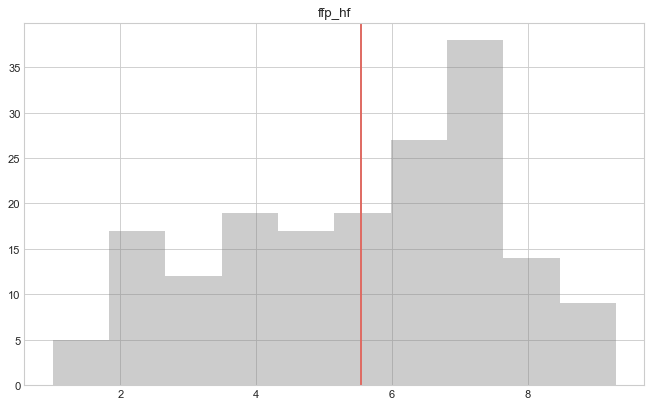

In [83]:
plot_hist(df_2, df, 'ffp_hf', sample_mean=True, true_mean=True)

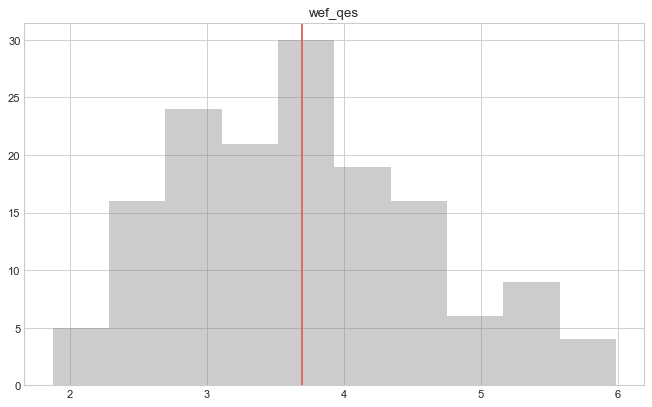

In [84]:
plot_hist(df_2, df, 'wef_qes', sample_mean=True, true_mean=True)

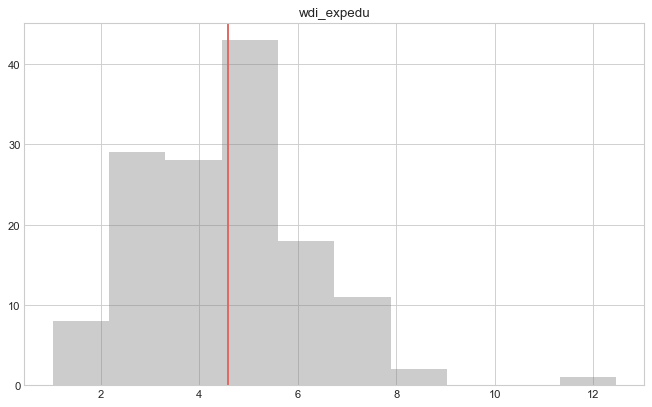

In [85]:
plot_hist(df_2, df, 'wdi_expedu', sample_mean=True, true_mean=True)

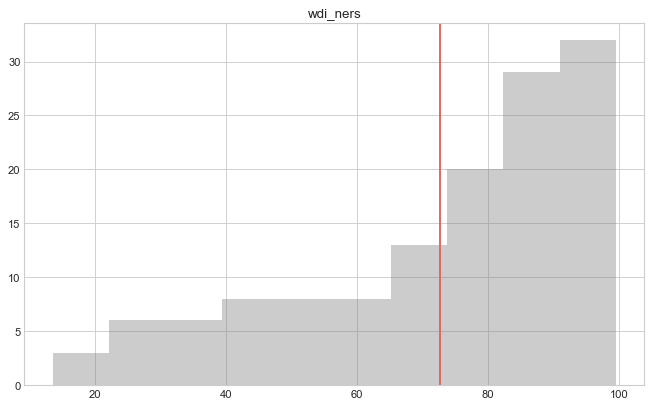

In [86]:
plot_hist(df_2, df, 'wdi_ners', sample_mean=True, true_mean=True)

In [87]:
def dotplot(df, plot_var, plot_by, global_stat = False, statistic = 'mean'):
    tmp_df = df.loc[:, [plot_by, plot_var]]
    if statistic is 'mean':
        tmp_group_stat = tmp_df.groupby(plot_by)[plot_var].mean()
    if statistic is 'median':
        tmp_group_stat = tmp_df.groupby(plot_by)[plot_var].median()
    plt.plot(tmp_group_stat.values, tmp_group_stat.index, 'o', color = 'grey')

    if global_stat is True and statistic is 'mean':
        plt.axvline(df[plot_var].mean(), color = 'tomato', linestyle='--')
    if global_stat is True and statistic is 'median':
        plt.axvline(df[plot_var].median(), color = 'tomato', linestyle='--')

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\dmard\AppData\Local\Temp\ipykernel_23304\522226526.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if statistic is 'mean':
C:\Users\dmard\AppData\Local\Temp\ipykernel_23304\522226526.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if statistic is 'median':
C:\Users\dmard\AppData\Local\Temp\ipykernel_23304\522226526.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if global_stat is True and statistic is 'mean':
C:\Users\dmard\AppData\Local\Temp\ipykernel

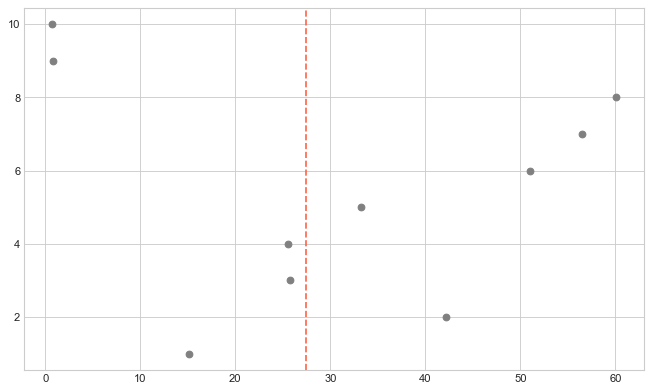

In [88]:
dotplot(df, plot_var='imf_pop', plot_by='ht_region', global_stat=True, statistic='mean')

In [89]:
df_2.to_csv("datasets/saved/subsample_df_2_demo.csv", na_rep='NaN')
df_3.to_csv("datasets/saved/subsample_df_3_demo.csv", na_rep='NaN')

In [90]:
df_def_1 = pd.read_csv('datasets/saved/subsample_df_2_demo.csv')
df_def_1.head()

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,flagnull
0,0,Afghanistan,AFG,8,1282.6400,0.479,29.825001,8.1,NaN,3.78028,48.750320,True
1,1,Albania,ALB,1,8516.7002,0.762,NaN,7.1,4.111339,3.53944,85.278214,False
2,2,Algeria,DZA,3,5402.1699,0.743,39.113998,5.1,2.977302,NaN,NaN,False
3,3,Andorra,AND,5,32367.3300,0.857,NaN,NaN,NaN,2.99781,NaN,True
4,4,Angola,AGO,4,3771.2000,0.531,25.789000,6.0,2.134716,NaN,NaN,False


In [91]:
df_def_2 = pd.read_csv('datasets/saved/subsample_df_3_demo.csv')
df_def_2.head()

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,flagnull
0,0,Afghanistan,AFG,8,1282.6400,0.479,29.825001,NaN,0.010000,NaN,8.182274,False
1,1,Albania,ALB,1,8516.7002,0.762,NaN,15.000000,4.510000,29.700001,5.883105,True
2,2,Algeria,DZA,3,5402.1699,0.743,39.113998,17.200001,0.530000,NaN,7.207178,False
3,3,Andorra,AND,5,32367.3300,0.857,NaN,NaN,9.979999,33.099998,8.127135,True
4,4,Angola,AGO,4,3771.2000,0.531,25.789000,99.500000,8.330000,NaN,3.306983,False


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


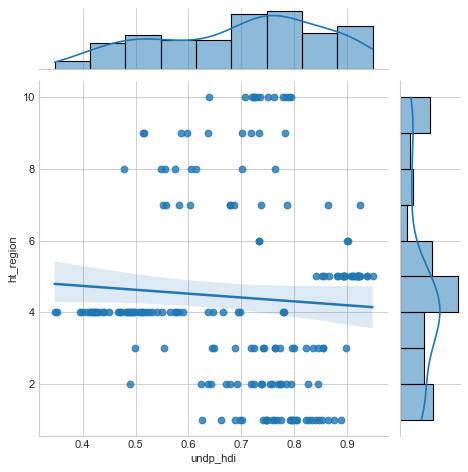

In [92]:
sns.jointplot(df_def_1['undp_hdi'], df_def_2['ht_region'], kind = 'reg')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


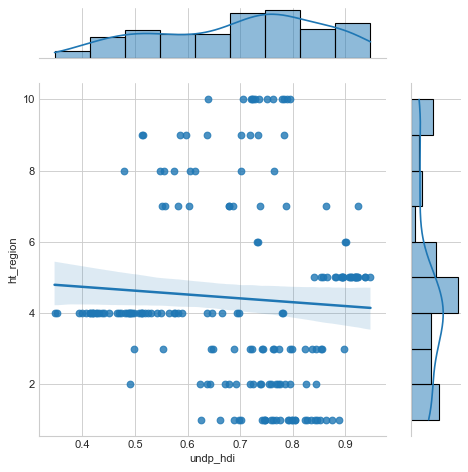

In [93]:
sns.jointplot(df['undp_hdi'], df['ht_region'], kind = 'reg', space=.5, dropna=True)

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion empirica de undp_hdi')

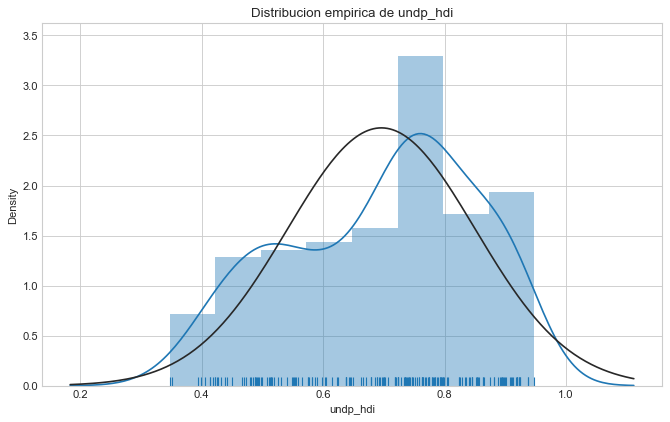

In [96]:
sns.distplot(df['undp_hdi'].dropna(), rug=True, fit=stats.norm)
plt.title('Distribucion empirica de undp_hdi')